In [54]:
#loading in tensor flow and importing data/other needed
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
fmnist = tf.keras.datasets.fashion_mnist

In [55]:
(x_train, y_train), (x_valid, y_valid) = fmnist.load_data()

x training data shape = (60000, 28, 28)
x valid data shape= (10000, 28, 28)
x training data type = uint8
x valid data type = uint8
x training minimum value = 0
x training maximum value = 255
image shows: 9


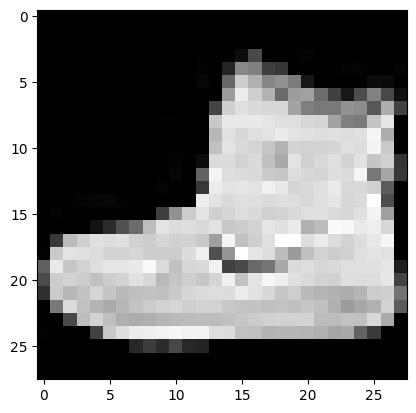

In [56]:
print("x training data shape =", x_train.shape)
print("x valid data shape=", x_valid.shape)
print("x training data type =", x_train.dtype)
print("x valid data type =", x_valid.dtype)
print("x training minimum value =", x_train.min())
print("x training maximum value =", x_train.max())

#First Image
img = x_train[0]
plt.imshow(img, cmap='gray')
print("image shows:", y_train[0])

In [57]:
#flattening data
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)
#validate falttening
print("x training data shape =", x_train.shape)
print("x valid data shape=", x_valid.shape)

x training data shape = (60000, 784)
x valid data shape= (10000, 784)


In [58]:
#Normalizing data
x_train = x_train/255
x_valid = x_valid/255
#validate normalization
print("x training data type =", x_train.dtype)
print("x training minimum value =", x_train.min())
print("x training maximum value =", x_train.max())

x training data type = float64
x training minimum value = 0.0
x training maximum value = 1.0


In [59]:
#categorically Encoding Labels
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)


Model Creation:

In [60]:
#Model Instantiation-data will pass through a series of layers in sequence:
from tensorflow.keras.models import Sequential
model = Sequential()

#create first import dense layer class:
from tensorflow.keras.layers import Dense
#using relu activation function, help our network to learn how to make more sophisticated guesses about data, specify shape is a 1D array of 784 values
model.add(Dense(units=1024, activation='sigmoid'))#, input_shape=(784,)))
#adding another density layer
model.add(Dense(units = 1024, activation='sigmoid'))

#create output layer, uses softmax which softmax which will result in each of the layer's values being a probability between 0 and 1 and all adding to 1
model.add(Dense(units = 10, activation='softmax'))


In [61]:
#Summarizing the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
#compiling model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
#Training the Model
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7059 - loss: 0.8286 - val_accuracy: 0.8001 - val_loss: 0.5383
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.8436 - loss: 0.4289 - val_accuracy: 0.8499 - val_loss: 0.4153
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 30ms/step - accuracy: 0.8606 - loss: 0.3733 - val_accuracy: 0.8654 - val_loss: 0.3734
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8743 - loss: 0.3392 - val_accuracy: 0.8656 - val_loss: 0.3807
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8819 - loss: 0.3167 - val_accuracy: 0.8671 - val_loss: 0.3742
